In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pylab as pl
import time 
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:/Users/Acer/Desktop/Research/BankSectorFrom2008.xlsx',index_col=0)

In [3]:
df.head()

,COMB,DFCC,HDFC,HNB,NDB,NTB,PABC,SAMP,SEYB
Date,,,,,,,,,
2008-01-02,145.00,125.50,126.0,122.00,167.50,29.75,10.0,115.50,32.00
2008-01-03,145.25,123.50,125.5,122.00,164.50,29.00,10.0,116.00,32.00
2008-01-04,145.75,122.00,123.0,121.25,163.75,29.00,10.0,115.25,31.25
2008-01-07,145.00,123.75,122.5,122.00,163.50,29.00,10.0,115.00,32.00
2008-01-08,144.00,120.25,117.0,122.00,163.00,28.50,9.5,115.00,31.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2221 entries, 2008-01-02 to 2017-03-31
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   COMB    2221 non-null   float64
 1   DFCC    2221 non-null   float64
 2   HDFC    2221 non-null   float64
 3   HNB     2221 non-null   float64
 4   NDB     2221 non-null   float64
 5   NTB     2221 non-null   float64
 6   PABC    2221 non-null   float64
 7   SAMP    2221 non-null   float64
 8   SEYB    2221 non-null   float64
dtypes: float64(9)
memory usage: 173.5 KB


In [5]:
x= df.values

In [6]:

covar_matrix = PCA(n_components = 9)

In [7]:
def generate_PCA_features_plot_after_clustering (x, cluster_name):
    # For the 20 features
    covar_matrix = PCA(n_components = 9)
    covar_matrix.fit(x)
    variance = covar_matrix.explained_variance_ratio_

    #calculate variance ratios
    var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
    print ("VARIANCE: " + str(var))
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 9, 1))
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Principal Components')
    plt.title('PCA Analysis for ')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)
    plt.grid()
    plt.show()
    
    my_header = ['COMB','DFCC','HDFC','HNB','NDB','NTB','PABC','SAMP','SEYB','UBC']
    
    OPTIMUM_NUM_OF_FEATURES = 9

    # Let's see first what amount of variance does each PC explain.

    # To sum up, look at the absolute values of the Eigenvectors'
    # components corresponding to the k largest Eigenvalues. In sklearn
    # the components are sorted by explained_variance_. The larger they are these absolute values, 
    #the more a specific feature contributes to that principal component

    print ("\nmost important features; most to least.......\n")

    print ("\nEigen values....\n")
    print (covar_matrix.explained_variance_)

    print ("\n")
    print(covar_matrix.singular_values_)  

    # Empirical mean
    print (covar_matrix.mean_)

    '''
    # conturibution the original fetures towards to new PCs 
    print (pd.DataFrame(covar_matrix.components_, columns=x.columns, index = ['PC-1','PC-2', 'PC-3', 'PC-4','PC-5','PC-6','PC-7','PC-8','PC-9',
                                                              'PC-10','PC-11','PC-12','PC-13','PC-14','PC-15','PC-16','PC-17','PC-18','PC-19','PC-20']))
    '''
    
    list_of_list_features = []

    contribution_COMB = 0
    contribution_DFCC = 0
    contribution_HDFC = 0
    contribution_HNB = 0
    contribution_NDB = 0
    contribution_NTB = 0
    contribution_PABC = 0
    contribution_SAMP = 0
    contribution_SEYB = 0
   
    
    print ("\n")
    for i, component in enumerate(covar_matrix.components_):
        print("{} component: {}% of initial variance".format(i + 1, round(100 * covar_matrix.explained_variance_ratio_[i], 2)))
        # print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, my_header)))

        for value, name in zip(component, my_header):
            print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, my_header)))
            if name == "COMB":
                contribution_COMB += abs(value)
            elif name == "DFCC":
                contribution_DFCC += abs(value)
            elif name == "HDFC":
                contribution_HDFC += abs(value)
            elif name == "HNB":
                contribution_HNB += abs(value)
            elif name == "NDB":
                contribution_NDB += abs(value)
            elif name == "NTB":
                contribution_NTB += abs(value)
            elif name == "PABC":
                contribution_PABC += abs(value)
            elif name == "SAMP":
                contribution_SAMP += abs(value)
            elif name == "SEYB":
                contribution_SEYB += abs(value) 
            

    print (list_of_list_features)
    print ("LENGTH:", len(list_of_list_features))

    '''
    for my_list in range (len(list_of_list_features)):
        print (list_of_list_features)
    '''

    list_of_list_features.append(["COMB", contribution_COMB])
    list_of_list_features.append(["DFCC", contribution_DFCC]) 
    list_of_list_features.append(["HDFC", contribution_HDFC])
    list_of_list_features.append(["HNB", contribution_HNB])
    list_of_list_features.append(["NDB", contribution_NDB])
    list_of_list_features.append(["NTB", contribution_NTB])
    list_of_list_features.append(["PABC", contribution_PABC])
    list_of_list_features.append(["SAMP", contribution_SAMP])
    list_of_list_features.append(["SEYB", contribution_SEYB])
    

    print ("\n -------------- contribution of features to the cluster -------------- \n")
    print ("COMB", contribution_COMB) 
    print ("DFCC", contribution_DFCC) 
    print ("HDFC", contribution_HDFC) 
    print ("HNB", contribution_HNB) 
    print ("NDB", contribution_NDB) 
    print ("NTB", contribution_NTB) 
    print ("PABC", contribution_PABC) 
    print ("SAMP", contribution_SAMP) 
    print ("SEYB", contribution_SEYB) 
     

    print (list_of_list_features)
 
    # sort the values and find the first 5 features that contributes teh most to the specific cluster
    sorted_list = sorted(list_of_list_features, key=lambda x: float(x[1]), reverse=True)

    print ("\nSorted features list\n")
    print (sorted_list)
    
    print ("\n------ First five features contributing the most to the cluster: %s ------\n" % cluster_name)
    for item in sorted_list[:5]:
        print (item)
        

    return OPTIMUM_NUM_OF_FEATURES 
    

In [8]:
def generate_PCA_features_plot (x):
    covar_matrix = PCA(n_components = 9)
    #we have 20 features
    covar_matrix.fit(x)
    variance = covar_matrix.explained_variance_ratio_

    #calculate variance ratios
    var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

    print ("\n============================ PCA ========================\n")
  
    my_header = ['COMB','DFCC','HDFC','HNB','NDB','NTB','PABC','SAMP','SEYB']
    
    print ("VARIANCE: " + str(var)) # by default it's in acending order - cumulative


    # ------- plot shows that how many features are needed to cover the entire data --------
    # Do we get the magic number by visuvalization or programmatically ???
    # using visualization, the optimum num. of features is 16....

    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 9, 1)) # num. of features in the initial dataset is 9
    #ax.set_yticks(np.arange(0, 9, 1))
    
    plt.ylabel('% Variance Explained')
    plt.xlabel('# of Principal components')
    plt.title('PCA Analysis')
    plt.ylim(30,100.5)
    plt.style.context('seaborn-whitegrid')

    plt.plot(var)
    plt.grid()
    plt.show()

    OPTIMUM_NUM_OF_FEATURES = 9

    # Let's see first what amount of variance does each PC explain.
    #print (covar_matrix.explained_variance_ratio_)

    #print(abs( covar_matrix.components_ ))

    # To sum up, look at the absolute values of the Eigenvectors'
    # components corresponding to the k largest Eigenvalues. In sklearn
    # the components are sorted by explained_variance_. The larger they are these absolute values, the more a specific feature contributes to that principal component

    print ("\nmost important features; most to least.......\n")
    print (covar_matrix.explained_variance_)

    '''
    # conturibution the original fetures towards to new PCs 
    print (pd.DataFrame(covar_matrix.components_, columns=x.columns, index = ['PC-1','PC-2', 'PC-3', 'PC-4','PC-5','PC-6','PC-7','PC-8','PC-9']))
    '''

    '''
    for i, component in enumerate(covar_matrix.components_):
        print("{} component: {}% of initial variance".format(i + 1, round(100 * covar_matrix.explained_variance_ratio_[i], 2)))
        print(" + ".join("%.3f x %s" % (value, name) for value, name in zip(component, my_header)))
        print ("\n")
    '''

    return OPTIMUM_NUM_OF_FEATURES


============================ PCA ========================

VARIANCE: [ 90.5  98.   98.9  99.4  99.7  99.9 100.  100.  100. ]


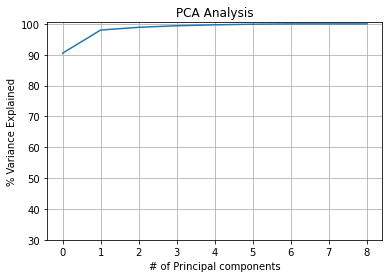


most important features; most to least.......

[1.90130970e+05 1.58552068e+04 1.79040744e+03 1.02472485e+03
 6.77897539e+02 3.26931763e+02 1.92243650e+02 1.87488295e+01
 1.33038855e+01]


9

In [9]:
 generate_PCA_features_plot (x)